# <span style="color:Blue"><center> **Proyecto Análisis de Sentimiento y pronóstico precio de la acción NASDAQ**</center></span>
# <span style="color:Green">**Análisis de sentimiento - Exploratorio**</span>


* María Camila Góngora Albán (mcgongoraa@unal.edu.co)
* Neyfer Leandro Gómez Gil (nlgomezg@unal.edu.co)

******

## *Referencias*

* [finBERT](https://github.com/ProsusAI/finBERT)

## *Contenido*

## *Análisis Descriptivo*

[FinancialPhraseBank](https://www.researchgate.net/profile/Pekka_Malo/publication/251231364_FinancialPhraseBank-v10/data/0c96051eee4fb1d56e000000/FinancialPhraseBank-v10.zip?origin=publication_list)

Banco de frases para entrenar y evaluar modelos para textos de noticias financieras y económicas. El conjunto de datos proporciona una colección de alrededor de 5000 frases/oraciones extraídas de textos de noticias financieras y comunicados de prensa de la empresa que están etiquetados como positivos, negativos o neutrales por un grupo de 16 anotadores con formación empresarial.

El corpus utilizado en este artículo está compuesto de noticias en inglés sobre todas las empresas cotizadas en OMX Helsinki. La noticia se ha descargado de la base de datos LexisNexis mediante web scraper automatizado. De esta base de datos de noticias, se seleccionó un subconjunto aleatorio de 10,000 artículos para obtener una buena cobertura en empresas grandes y pequeñas, empresas de diferentes industrias, así como diferentes fuentes de noticias. Siguiendo el enfoque adoptado por Maks y Vossen (2010), excluimos todas las oraciones que no contenían ninguna de las entidades léxicas. Esto redujo la muestra general a 53,400 entences, donde cada uno tiene al menos una o más entidades léxicas reconocidas. Luego, las oraciones se clasificaron de acuerdo con los tipos de secuencias de entidades detectadas. Finalmente, se eligió una muestra aleatoria de ∼5000 oraciones para representar la base de datos de noticias en general.[Malo et al. (2014)](https://www.researchgate.net/publication/251231107_Good_Debt_or_Bad_Debt_Detecting_Semantic_Orientations_in_Economic_Texts)

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
data = pd.read_csv('Documentacion/Sentences_50Agree.txt', sep='.@', names=['text','label'],engine='python')

train, test = train_test_split(data, test_size=0.2, random_state=0)
train, valid = train_test_split(train, test_size=0.1, random_state=0)

In [20]:
train.to_csv('data/sentiment_data/train.csv',sep='\t')
test.to_csv('data/sentiment_data/test.csv',sep='\t')
valid.to_csv('data/sentiment_data/validation.csv',sep='\t')

In [19]:
data

,text,label
0,"According to Gran , the company has no plans t...",neutral
1,Technopolis plans to develop in stages an area...,neutral
2,The international electronic industry company ...,negative
3,With the new production plant the company woul...,positive
4,According to the company 's updated strategy f...,positive
...,...,...
4841,LONDON MarketWatch -- Share prices ended lower...,negative
4842,Rinkuskiai 's beer sales fell by 6.5 per cent ...,neutral
4843,Operating profit fell to EUR 35.4 mn from EUR ...,negative
4844,Net sales of the Paper segment decreased to EU...,negative


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    4846 non-null   object
 1   label   4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


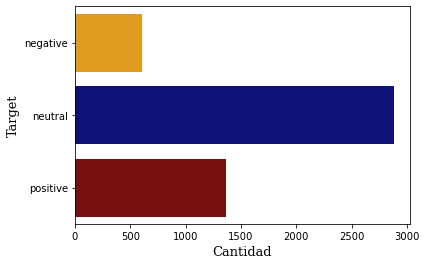

In [27]:
tabla=data.groupby('label')['text'].count().reset_index()

sns.barplot(data=tabla, x='text', y='label',palette=["orange","darkblue","darkred"])
plt.xlabel("Cantidad",fontdict={"family":"serif","color":"Black","size":13})
plt.ylabel("Target",fontdict={"family":"serif","color":"Black","size":13})
plt.show()

## *Limpieza del Corpus*

### *Polaridad negativa*

In [28]:
df=data[data['label']=='negative']
words = ' '.join(df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [29]:
words[0:500]

'The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported  A tinyurl link takes users to a scamming site promising that users can earn thousands of dollars by becoming a Google ( NASDAQ : GOOG ) Cash advertiser  Compared with the FTSE 100 index , which rose 36.7 points ( or 0.6 % ) on the day , this was a relative price change of'

In [30]:
cleaned_word[0:500]

'The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported A tinyurl link takes users to a scamming site promising that users can earn thousands of dollars by becoming a Google ( NASDAQ : GOOG ) Cash advertiser Compared with the FTSE 100 index , which rose 36.7 points ( or 0.6 % ) on the day , this was a relative price change of -'

In [32]:
import re
def preprocess(message):
    """
    This function takes a string as input, then performs these operations: 
        - lowercase
        - remove URLs
        - remove ticker symbols 
        - removes punctuation
        - tokenize by splitting the string on whitespace 
        - removes any single character tokens
    
    Parameters
    ----------
        message : The text message to be preprocessed.
        
    Returns
    -------
        tokens: The preprocessed text into tokens.
    """ 
    # Lowercase the twit message
    text = message.lower()
    
    # Replace URLs with a space in the message
    text = re.sub('https?:\/\/[a-zA-Z0-9@:%._\/+~#=?&;-]*', ' ', text)
    
    # Replace ticker symbols with a space. The ticker symbols are any stock symbol that starts with $.
    text = re.sub('\$[a-zA-Z0-9]*', ' ', text)
    
    # Replace StockTwits usernames with a space. The usernames are any word that starts with @.
    text = re.sub('\@[a-zA-Z0-9]*', ' ', text)

    # Replace everything not a letter with a space
    text = re.sub('[^a-zA-Z]', ' ', text)
    
    return text

In [34]:
cleaned_word2=preprocess(cleaned_word)
cleaned_word2[0:500]

'the international electronic industry company elcoteq has laid off tens of employees from its tallinn facility   contrary to earlier layoffs the company contracted the ranks of its office workers   the daily postimees reported a tinyurl link takes users to a scamming site promising that users can earn thousands of dollars by becoming a google   nasdaq   goog   cash advertiser compared with the ftse     index   which rose      points   or         on the day   this was a relative price change of  '

In [35]:
from collections import defaultdict, Counter

all_words=[]
for word in range(len(cleaned_word2.split())):
    all_words.append(cleaned_word2.split()[word])
    
all_words  

['the',
 'international',
 'electronic',
 'industry',
 'company',
 'elcoteq',
 'has',
 'laid',
 'off',
 'tens',
 'of',
 'employees',
 'from',
 'its',
 'tallinn',
 'facility',
 'contrary',
 'to',
 'earlier',
 'layoffs',
 'the',
 'company',
 'contracted',
 'the',
 'ranks',
 'of',
 'its',
 'office',
 'workers',
 'the',
 'daily',
 'postimees',
 'reported',
 'a',
 'tinyurl',
 'link',
 'takes',
 'users',
 'to',
 'a',
 'scamming',
 'site',
 'promising',
 'that',
 'users',
 'can',
 'earn',
 'thousands',
 'of',
 'dollars',
 'by',
 'becoming',
 'a',
 'google',
 'nasdaq',
 'goog',
 'cash',
 'advertiser',
 'compared',
 'with',
 'the',
 'ftse',
 'index',
 'which',
 'rose',
 'points',
 'or',
 'on',
 'the',
 'day',
 'this',
 'was',
 'a',
 'relative',
 'price',
 'change',
 'of',
 'compared',
 'with',
 'the',
 'ftse',
 'index',
 'which',
 'rose',
 'points',
 'or',
 'on',
 'the',
 'day',
 'this',
 'was',
 'a',
 'relative',
 'price',
 'change',
 'of',
 'one',
 'of',
 'the',
 'challenges',
 'in',
 'the',


In [36]:
#all_words = [word for message in cleaned_word for word in message.split()]
print('The number of all words: ', len(all_words))

counts = Counter(all_words)
print('The number of unique words: ', len(counts))

bow = sorted(counts, key=counts.get, reverse=True)
print('Top 40 frequent words: ', bow[:40])

The number of all words:  11836
The number of unique words:  2008
Top 40 frequent words:  ['the', 'in', 'of', 'eur', 'to', 'mn', 'a', 'from', 'and', 'profit', 'for', 's', 'net', 'finnish', 'company', 'year', 'sales', 'operating', 'by', 'on', 'period', 'quarter', 'm', 'down', 'its', 'at', 'million', 'was', 'said', 'loss', 'will', 'compared', 'decreased', 'mln', 'that', 'has', 'first', 'as', 'oyj', 'finland']


In [37]:
from wordcloud import WordCloud,STOPWORDS
text = " ".join(bow[:150])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(text)

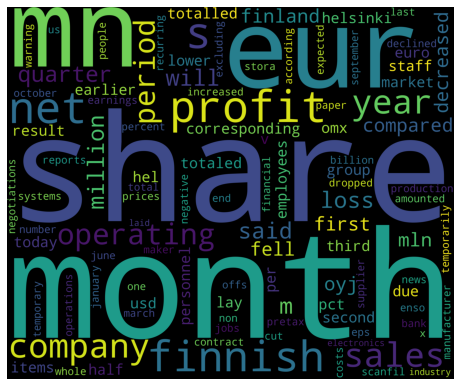

In [38]:
plt.figure(1,figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### *Polaridad positiva*

In [39]:
df=data[data['label']=='positive']
words = ' '.join(df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [40]:
words[0:500]

"With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability  According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales  FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is aggressively pursuing its growth strategy by in"

In [41]:
cleaned_word[0:500]

"With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is aggressively pursuing its growth strategy by incr"

In [42]:
cleaned_word2=preprocess(cleaned_word)
cleaned_word2[0:500]

'with the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability according to the company  s updated strategy for the years             basware targets a long term net sales growth in the range of            with an operating profit margin of            of net sales financing of aspocomp  s growth aspocomp is aggressively pursuing its growth strategy by incr'

In [43]:
from collections import defaultdict, Counter

all_words=[]
for word in range(len(cleaned_word2.split())):
    all_words.append(cleaned_word2.split()[word])
    
all_words  

['with',
 'the',
 'new',
 'production',
 'plant',
 'the',
 'company',
 'would',
 'increase',
 'its',
 'capacity',
 'to',
 'meet',
 'the',
 'expected',
 'increase',
 'in',
 'demand',
 'and',
 'would',
 'improve',
 'the',
 'use',
 'of',
 'raw',
 'materials',
 'and',
 'therefore',
 'increase',
 'the',
 'production',
 'profitability',
 'according',
 'to',
 'the',
 'company',
 's',
 'updated',
 'strategy',
 'for',
 'the',
 'years',
 'basware',
 'targets',
 'a',
 'long',
 'term',
 'net',
 'sales',
 'growth',
 'in',
 'the',
 'range',
 'of',
 'with',
 'an',
 'operating',
 'profit',
 'margin',
 'of',
 'of',
 'net',
 'sales',
 'financing',
 'of',
 'aspocomp',
 's',
 'growth',
 'aspocomp',
 'is',
 'aggressively',
 'pursuing',
 'its',
 'growth',
 'strategy',
 'by',
 'increasingly',
 'focusing',
 'on',
 'technologically',
 'more',
 'demanding',
 'hdi',
 'printed',
 'circuit',
 'boards',
 'pcbs',
 'for',
 'the',
 'last',
 'quarter',
 'of',
 'componenta',
 's',
 'net',
 'sales',
 'doubled',
 'to',
 '

In [44]:
#all_words = [word for message in cleaned_word for word in message.split()]
print('The number of all words: ', len(all_words))

counts = Counter(all_words)
print('The number of unique words: ', len(counts))

bow = sorted(counts, key=counts.get, reverse=True)
print('Top 40 frequent words: ', bow[:40])

The number of all words:  28440
The number of unique words:  4200
Top 40 frequent words:  ['the', 'in', 'to', 'of', 'and', 'eur', 'a', 'for', 'from', 's', 'mn', 'its', 'company', 'said', 'year', 'has', 'm', 'finnish', 'with', 'by', 'net', 'on', 'sales', 'profit', 'will', 'it', 'million', 'is', 'period', 'that', 'mln', 'operating', 'as', 'an', 'quarter', 'at', 'up', 'was', 'oyj', 'group']


In [45]:
from wordcloud import WordCloud,STOPWORDS
text = " ".join(bow[:150])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(text)

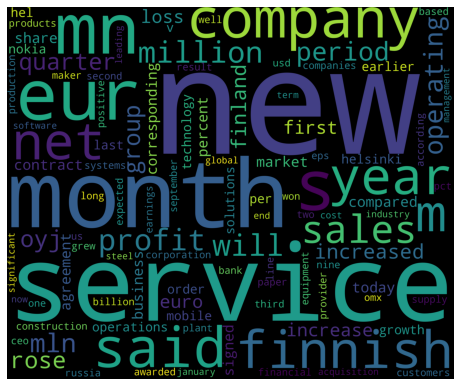

In [46]:
plt.figure(1,figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()